# Heart Disease Data Set

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


### Description

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

### Heart Disease Classification 

Perform exploratory data analysis on the data. Then, train and validate different ML classifiers.

In [1]:
import pandas as pd
df = pd.read_csv("./data/heart.csv")
df.shape

(303, 14)

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


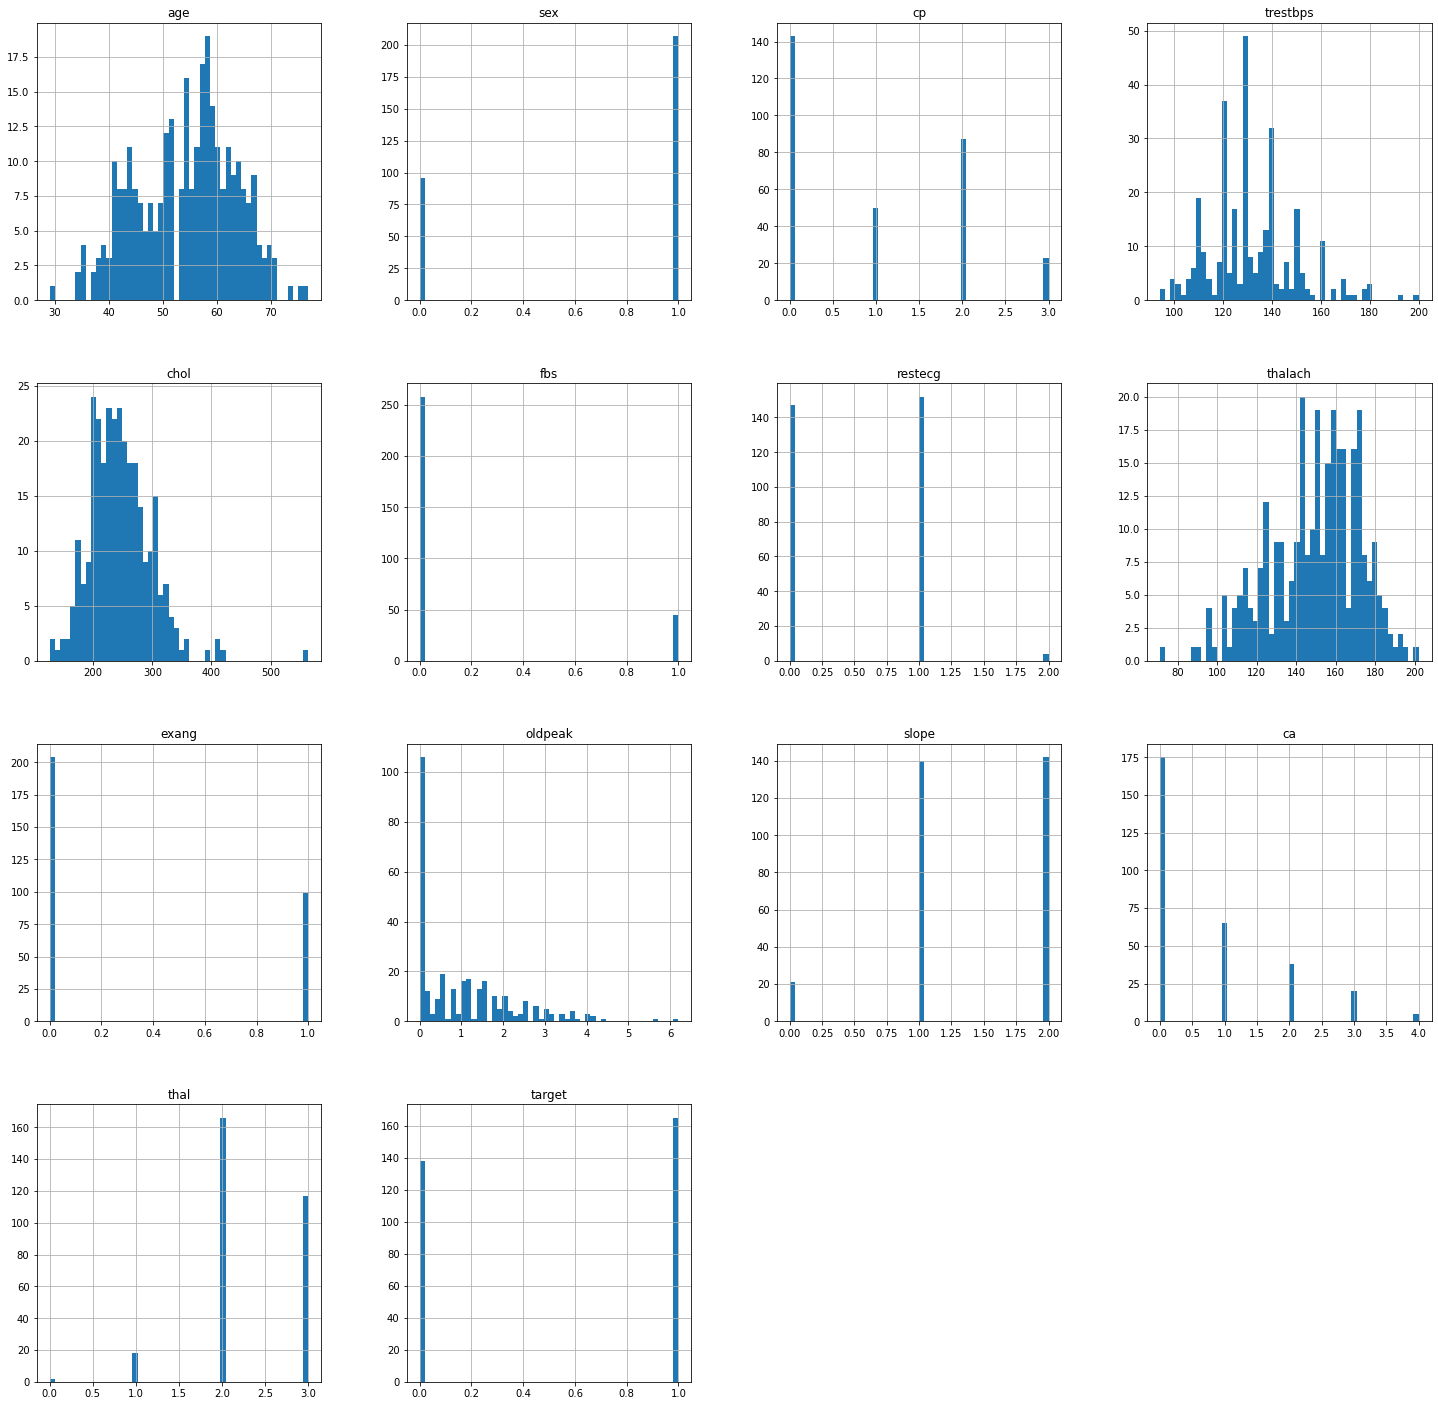

In [3]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,25))
plt.show()

In [4]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<AxesSubplot:xlabel='cp', ylabel='cp'>,
        <AxesSubplot:xlabel='slope', ylabel='cp'>,
        <AxesSubplot:xlabel='thalach', ylabel='cp'>,
        <AxesSubplot:xlabel='restecg', ylabel='cp'>,
        <AxesSubplot:xlabel='target', ylabel='cp'>],
       [<AxesSubplot:xlabel='cp', ylabel='slope'>,
        <AxesSubplot:xlabel='slope', ylabel='slope'>,
        <AxesSubplot:xlabel='thalach', ylabel='slope'>,
        <AxesSubplot:xlabel='restecg', ylabel='slope'>,
        <AxesSubplot:xlabel='target', ylabel='slope'>],
       [<AxesSubplot:xlabel='cp', ylabel='thalach'>,
        <AxesSubplot:xlabel='slope', ylabel='thalach'>,
        <AxesSubplot:xlabel='thalach', ylabel='thalach'>,
        <AxesSubplot:xlabel='restecg', ylabel='thalach'>,
        <AxesSubplot:xlabel='target', ylabel='thalach'>],
       [<AxesSubplot:xlabel='cp', ylabel='restecg'>,
        <AxesSubplot:xlabel='slope', ylabel='restecg'>,
        <AxesSubplot:xlabel='thalach', ylabel='restecg'>,
        <AxesSubplo

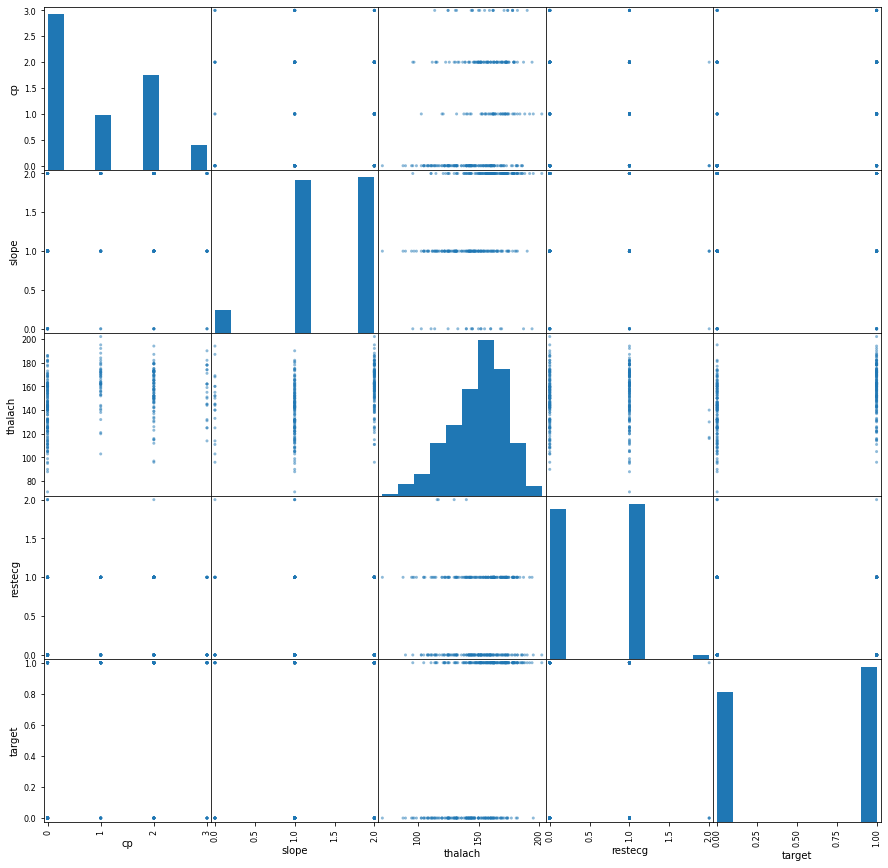

In [6]:
from pandas.plotting import scatter_matrix
attributes = ["cp", "slope", "thalach", "restecg", "target"]
scatter_matrix(df[attributes], figsize = (15, 15))

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


df_num = df.select_dtypes(include=[np.number])
df_num_trans = num_pipeline.fit_transform(df_num)
df_num_trans
df_num_trans.shape

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ["age", "trestbps", "chol", "thalach", "exang", "oldpeak", "ca"]
cat_attribs = ["sex", "cp", "fbs", "restecg", "slope", "thal"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
heart = df.drop("target", axis = 1)
heart_disease = df["target"].copy()
heart_prepared = full_pipeline.fit_transform(heart)
heart_prepared
heart_prepared.shape

(303, 25)

In [10]:
heart_df = pd.DataFrame(heart_prepared)
heart_df["target"] = heart_disease
heart_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,target
0,0.952197,0.763956,-0.256334,0.015443,-0.696631,1.087338,-0.714429,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,-1.915313,-0.092738,0.072199,1.633471,-0.696631,2.122573,-0.714429,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,-1.474158,-0.092738,-0.816773,0.977514,-0.696631,0.310912,-0.714429,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.696631,-0.206705,-0.714429,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.290464,-0.663867,2.082050,0.583939,1.435481,-0.379244,-0.714429,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,1.435481,-0.724323,-0.714429,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
299,-1.033002,-1.234996,0.342756,-0.771706,-0.696631,0.138373,-0.714429,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
300,1.503641,0.706843,-1.029353,-0.378132,-0.696631,2.036303,1.244593,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
301,0.290464,-0.092738,-2.227533,-1.515125,1.435481,0.138373,0.265082,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [11]:
train_set, test_set = split_train_test(heart_df, 0.2)
heart_df.shape

(303, 26)

In [12]:
train_set.shape

(243, 26)

In [13]:
test_set.shape

(60, 26)

In [14]:
x = train_set.iloc[:,:25]
y = train_set.iloc[:,25]
print(x)
print(y)

           0         1         2         3         4         5         6   \
231  0.290464  1.906214  0.825893 -1.121550 -0.696631 -0.034166  2.224104   
234  1.724218 -0.092738  1.463634 -1.777508 -0.696631  1.173608  2.224104   
164 -1.805024  0.364165 -1.377212  1.021244 -0.696631 -0.896862  3.203615   
204  0.841908  1.620649 -1.589792 -0.203210 -0.696631  4.451851  2.224104   
44  -1.694735  0.478391  1.444309  1.414819 -0.696631 -0.896862 -0.714429   
..        ...       ...       ...       ...       ...       ...       ...   
62  -0.260980 -0.778093 -1.164631  1.764663 -0.696631 -0.896862 -0.714429   
83  -0.260980  1.163746  0.999823  1.239897 -0.696631  0.138373 -0.714429   
292  0.400752  2.191778 -0.410938 -0.159479  1.435481  1.518686  1.244593   
158  0.400752 -0.378302 -0.507565 -0.246940 -0.696631 -0.551783  3.203615   
161  0.069886  0.021488  1.850144  0.715131 -0.696631  0.138373 -0.714429   

      7    8    9   ...   15   16   17   18   19   20   21   22   23   24  

In [15]:
X = test_set.iloc[:,:25]
Y = test_set.iloc[:,25]
print(X)
print(Y)

           0         1         2         3         4         5         6   \
131 -0.591847  0.135714  0.478035  0.540209 -0.696631 -0.896862 -0.714429   
21  -1.143291 -0.092738 -0.256334  1.283627  1.435481 -0.551783 -0.714429   
174  0.621330 -0.092738 -0.778122 -0.771706  1.435481  1.173608  1.244593   
52   0.841908 -0.092738 -0.294985 -0.159479 -0.696631  0.655990  2.224104   
266  0.069886  2.762907  1.560262 -1.427664  1.435481  2.036303 -0.714429   
60   1.834507 -1.234996  0.362082 -0.859167 -0.696631 -0.896862  0.265082   
8   -0.260980  2.306004 -0.913400  0.540209 -0.696631 -0.465514 -0.714429   
84  -1.363869 -1.691899  0.362082 -1.209011 -0.696631 -0.379244 -0.714429   
57  -1.033002 -0.949431  0.265454  1.546010 -0.696631 -0.896862 -0.714429   
11  -0.702136 -0.092738  0.555337 -0.465593 -0.696631 -0.724323 -0.714429   
186  0.621330 -0.092738  0.130176 -0.246940  1.435481  0.310912  0.265082   
92  -0.260980  0.364165 -0.449589  0.846322 -0.696631 -0.896862  3.203615   

In [16]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x,y)
tree.predict(X)
test_set["predicted"] = tree.predict(X)
test_set.head()

<ipython-input-17-477d3ef872e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = tree.predict(X)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
131,-0.591847,0.135714,0.478035,0.540209,-0.696631,-0.896862,-0.714429,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
21,-1.143291,-0.092738,-0.256334,1.283627,1.435481,-0.551783,-0.714429,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
174,0.621330,-0.092738,-0.778122,-0.771706,1.435481,1.173608,1.244593,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
52,0.841908,-0.092738,-0.294985,-0.159479,-0.696631,0.655990,2.224104,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
266,0.069886,2.762907,1.560262,-1.427664,1.435481,2.036303,-0.714429,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1


In [18]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

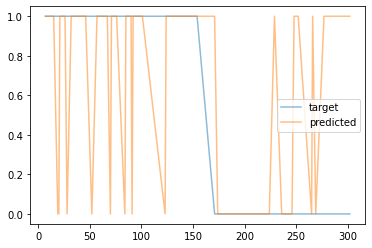

In [19]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[17,  7],
       [ 8, 28]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.75

In [22]:
from sklearn.metrics import mean_squared_error
tree_pred = tree.predict(X)
tree_mse = mean_squared_error(Y, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, x, y, scoring="neg_mean_squared_error", cv=50)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.         0.63245553 0.4472136  0.4472136  0.4472136  0.63245553
 0.4472136  0.63245553 0.4472136  0.63245553 0.63245553 0.4472136
 0.63245553 0.4472136  0.63245553 0.63245553 0.63245553 0.4472136
 0.77459667 0.         0.4472136  0.63245553 0.63245553 0.77459667
 0.63245553 0.4472136  0.4472136  0.         0.63245553 0.
 0.4472136  0.4472136  0.         0.         0.4472136  0.4472136
 0.63245553 0.4472136  0.4472136  0.63245553 0.4472136  0.4472136
 0.4472136  0.         1.         0.8660254  0.8660254  0.70710678
 0.70710678 0.5       ]
Mean: 0.49253125197858466
Standard deviation: 0.23751413815688505


In [24]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x,y)
forest.predict(X)
test_set["predicted"] = forest.predict(X)
test_set.head()

<ipython-input-24-e324e5324584>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = forest.predict(X)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
131,-0.591847,0.135714,0.478035,0.540209,-0.696631,-0.896862,-0.714429,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
21,-1.143291,-0.092738,-0.256334,1.283627,1.435481,-0.551783,-0.714429,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
174,0.621330,-0.092738,-0.778122,-0.771706,1.435481,1.173608,1.244593,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
52,0.841908,-0.092738,-0.294985,-0.159479,-0.696631,0.655990,2.224104,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
266,0.069886,2.762907,1.560262,-1.427664,1.435481,2.036303,-0.714429,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


In [25]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

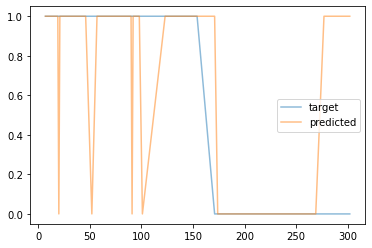

In [26]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[21,  3],
       [ 4, 32]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.8833333333333333

In [29]:
from sklearn.metrics import mean_squared_error
forest_pred = forest.predict(X)
forest_mse = mean_squared_error(Y, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.3415650255319866

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, x, y, scoring="neg_mean_squared_error", cv=50)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.         0.4472136  0.         0.         0.4472136  0.
 0.4472136  0.77459667 0.4472136  0.63245553 0.77459667 0.4472136
 0.4472136  0.4472136  0.63245553 0.         0.         0.4472136
 0.4472136  0.         0.4472136  0.4472136  0.4472136  0.63245553
 0.         0.         0.4472136  0.         0.63245553 0.
 0.         0.63245553 0.         0.4472136  0.4472136  0.
 0.4472136  0.4472136  0.4472136  0.4472136  0.4472136  0.
 0.4472136  0.         0.70710678 0.70710678 0.         0.70710678
 0.5        0.5       ]
Mean: 0.3444855369542021
Standard deviation: 0.2633053642244591


In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x,y)
log_reg.predict(X)
test_set["predicted"] = log_reg.predict(X)
test_set.head()


<ipython-input-31-5efd1f7bc4d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = log_reg.predict(X)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
131,-0.591847,0.135714,0.478035,0.540209,-0.696631,-0.896862,-0.714429,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
21,-1.143291,-0.092738,-0.256334,1.283627,1.435481,-0.551783,-0.714429,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
174,0.621330,-0.092738,-0.778122,-0.771706,1.435481,1.173608,1.244593,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
52,0.841908,-0.092738,-0.294985,-0.159479,-0.696631,0.655990,2.224104,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
266,0.069886,2.762907,1.560262,-1.427664,1.435481,2.036303,-0.714429,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


In [32]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

<AxesSubplot:>

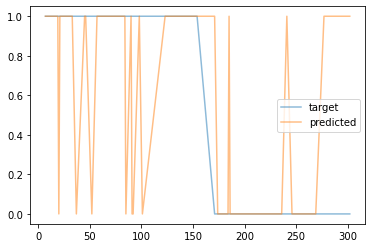

In [33]:
df_test[["target","predicted"]].plot(alpha=0.5)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[19,  5],
       [ 7, 29]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.8

In [36]:
log_pred = log_reg.predict(X)
log_mse = mean_squared_error(Y, log_pred)
log_rmse = np.sqrt(log_mse)
log_rmse

0.4472135954999579

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x, y, scoring="neg_mean_squared_error", cv=50)
log_rmse_scores = np.sqrt(-scores)
display_scores(log_rmse_scores)

Scores: [0.         0.4472136  0.         0.4472136  0.4472136  0.
 0.         0.4472136  0.63245553 0.63245553 0.63245553 0.
 0.         0.         0.4472136  0.         0.         0.4472136
 0.4472136  0.         0.4472136  0.4472136  0.         0.4472136
 0.4472136  0.         0.4472136  0.         0.63245553 0.
 0.         0.63245553 0.         0.4472136  0.4472136  0.4472136
 0.63245553 0.4472136  0.4472136  0.         0.4472136  0.
 0.4472136  0.         0.5        0.70710678 0.         0.70710678
 0.5        0.5       ]
Mean: 0.30412010138148704
Standard deviation: 0.257897196447953


In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x, y)
Y_model = model.predict(X)
test_set["predicted"] = model.predict(X)
test_set.head()

<ipython-input-38-471fd728731e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = model.predict(X)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
131,-0.591847,0.135714,0.478035,0.540209,-0.696631,-0.896862,-0.714429,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
21,-1.143291,-0.092738,-0.256334,1.283627,1.435481,-0.551783,-0.714429,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
174,0.621330,-0.092738,-0.778122,-0.771706,1.435481,1.173608,1.244593,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
52,0.841908,-0.092738,-0.294985,-0.159479,-0.696631,0.655990,2.224104,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
266,0.069886,2.762907,1.560262,-1.427664,1.435481,2.036303,-0.714429,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


In [39]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

<AxesSubplot:>

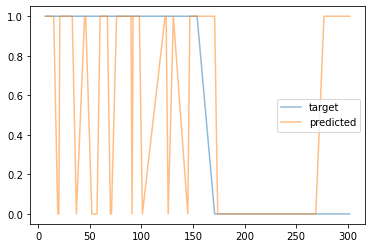

In [40]:
df_test[["target","predicted"]].plot(alpha=0.5)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[21,  3],
       [11, 25]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_model)

0.7666666666666667

In [43]:
from sklearn.metrics import mean_squared_error
knn_pred = model.predict(X)
knn_mse = mean_squared_error(Y, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.48304589153964794

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=50)
knn_rmse_scores = np.sqrt(-scores)
display_scores(knn_rmse_scores)

Scores: [0.         0.4472136  0.4472136  0.         0.4472136  0.
 0.         0.4472136  0.         0.4472136  0.63245553 0.63245553
 0.         0.4472136  0.4472136  0.63245553 0.4472136  0.63245553
 0.63245553 0.4472136  0.4472136  0.63245553 0.4472136  0.63245553
 0.         0.4472136  0.63245553 0.         0.63245553 0.4472136
 0.4472136  0.4472136  0.4472136  0.4472136  0.         0.
 0.63245553 0.4472136  0.63245553 0.4472136  0.4472136  0.
 0.4472136  0.5        0.70710678 0.5        0.5        0.5
 0.5        0.5       ]
Mean: 0.40111206278112194
Standard deviation: 0.2260732471821318


In [45]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(x,y)
SVM.predict(X)
test_set["predicted"] = SVM.predict(X)
test_set.head()

<ipython-input-45-0aaba105a26d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = SVM.predict(X)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
131,-0.591847,0.135714,0.478035,0.540209,-0.696631,-0.896862,-0.714429,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
21,-1.143291,-0.092738,-0.256334,1.283627,1.435481,-0.551783,-0.714429,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
174,0.621330,-0.092738,-0.778122,-0.771706,1.435481,1.173608,1.244593,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
52,0.841908,-0.092738,-0.294985,-0.159479,-0.696631,0.655990,2.224104,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
266,0.069886,2.762907,1.560262,-1.427664,1.435481,2.036303,-0.714429,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0


In [46]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

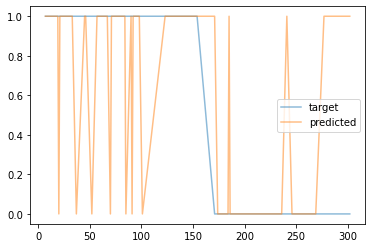

In [47]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[19,  5],
       [ 7, 29]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.8

In [50]:
SVM_pred = SVM.predict(X.iloc[:,:])
SVM_mse = mean_squared_error(Y, SVM_pred)
SVM_rmse = np.sqrt(SVM_mse)
SVM_rmse

0.4472135954999579

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVM, x, y, scoring="neg_mean_squared_error", cv=50)
SVM_rmse_scores = np.sqrt(-scores)
display_scores(SVM_rmse_scores)

Scores: [0.4472136  0.4472136  0.         0.63245553 0.4472136  0.
 0.4472136  0.63245553 0.63245553 0.63245553 0.63245553 0.
 0.         0.         0.63245553 0.         0.         0.
 0.4472136  0.         0.4472136  0.4472136  0.         0.4472136
 0.4472136  0.4472136  0.4472136  0.         0.63245553 0.
 0.         0.63245553 0.         0.4472136  0.4472136  0.4472136
 0.63245553 0.4472136  0.4472136  0.         0.4472136  0.
 0.4472136  0.         0.5        0.70710678 0.         0.70710678
 0.70710678 0.5       ]
Mean: 0.33726529701723934
Standard deviation: 0.2650511637927163
